<a href="https://colab.research.google.com/github/Amal642/Image-Classification-using-CNN/blob/main/Image_Classifcation_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

<Figure size 1080x144 with 0 Axes>

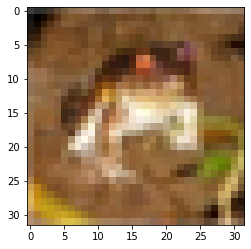

<Figure size 1080x144 with 0 Axes>

In [6]:
plt.imshow(x_train[0])
plt.figure(figsize=(15,2))

In [7]:
y_train = y_train.reshape(-1,)
y_train[3]

x_train=x_train/255
y_train=y_train/255


In [8]:
ann=models.Sequential([
                       keras.layers.Flatten(input_shape=(32,32,3)),
                       keras.layers.Dense(3000,activation='relu'),
                       keras.layers.Dense(1000,activation='relu'),
                       keras.layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 0.0029 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2026e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0477e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5362e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2408e-04 - accuracy: 0.1000


In [32]:
cnn=models.Sequential([
                       
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                       layers.MaxPooling2D(),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D(),


                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 2.0087 - accuracy: 0.3705
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3376 - accuracy: 0.5245
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1721 - accuracy: 0.5904
Epoch 4/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.0629 - accuracy: 0.6313
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9873 - accuracy: 0.6574
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9221 - accuracy: 0.6791
Epoch 7/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8561 - accuracy: 0.7027
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8086 - accuracy: 0.7207
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7541 - accuracy: 0.7396
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [33]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.1249 - accuracy: 0.6420


[1.1248953342437744, 0.6420000195503235]

In [37]:

y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [42]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

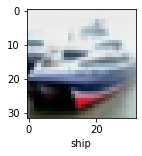

In [43]:
plot_sample(x_test,y_test,1)

In [44]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[4.3527576e-05, 2.8444583e-05, 1.3459984e-03, 8.6752862e-01,
        1.3557669e-03, 7.6832883e-02, 5.1663786e-02, 1.7095533e-04,
        1.0138080e-03, 1.6264012e-05],
       [7.1739785e-02, 4.5728478e-01, 9.7404124e-04, 5.7848729e-04,
        5.6732293e-05, 7.3342439e-05, 1.6159615e-04, 3.7360344e-06,
        4.6670988e-01, 2.4174841e-03],
       [1.4289337e-01, 2.4552710e-01, 3.1892168e-03, 6.8950346e-03,
        3.5537692e-04, 1.7580300e-03, 6.5607013e-04, 1.0742103e-04,
        5.7560116e-01, 2.3017230e-02],
       [5.0865561e-01, 5.5680212e-05, 2.4898729e-04, 1.4968579e-04,
        2.1320451e-03, 8.6881064e-06, 1.3079536e-05, 3.6959996e-06,
        4.8872879e-01, 3.7488508e-06],
       [1.3786709e-04, 6.2188519e-05, 4.4587802e-02, 1.6528943e-01,
        1.2590989e-01, 2.6199467e-02, 6.3737214e-01, 3.4527716e-04,
        2.1359208e-05, 7.4565680e-05]], dtype=float32)

In [45]:
y_classes=[np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report",classification_report(y_test,y_classes))

Classification Report               precision    recall  f1-score   support

           0       0.68      0.65      0.66      1000
           1       0.82      0.80      0.81      1000
           2       0.55      0.52      0.53      1000
           3       0.40      0.57      0.47      1000
           4       0.65      0.48      0.55      1000
           5       0.62      0.39      0.48      1000
           6       0.65      0.80      0.72      1000
           7       0.67      0.69      0.68      1000
           8       0.73      0.76      0.74      1000
           9       0.74      0.78      0.75      1000

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

